In [ ]:
# colab環境の場合は最初に実行
!mkdir data
!wget -O data/Davis.csv  https://raw.githubusercontent.com/matsubaraDaisuke/anomaly-detection/main/01_normal_distibution/data/Davis.csv

# 多次元正規分布に基づく異常検知

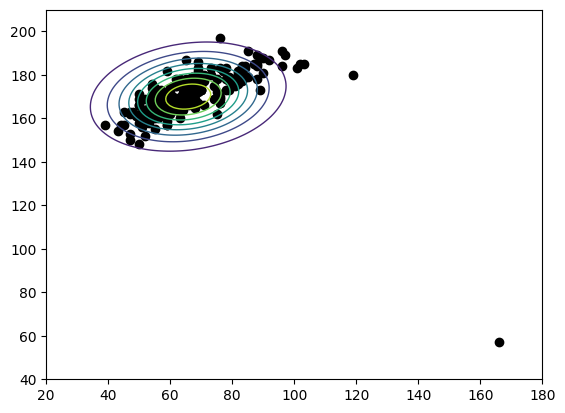

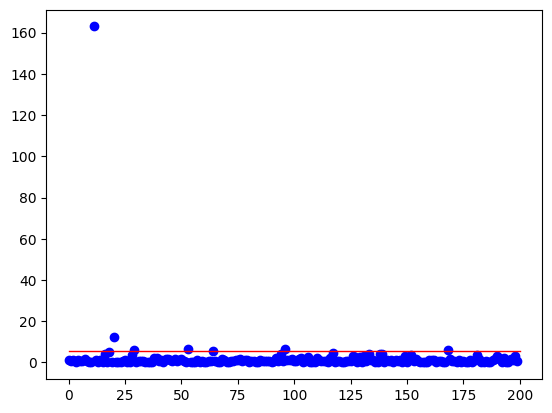

In [1]:
# coding: utf-8

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats
from numpy import linalg as la
from scipy.stats import norm
import seaborn as sns

from matplotlib import cm

davis = pd.read_csv('./data/Davis.csv').values
d = davis[: ,2:4]
# 元データをプロットする
plt.scatter( d[:,0], d[:,1],color='black')
plt.xlim(20,180)
plt.ylim(40,210)
x =  np.arange(20, 180,1)
y =  np.arange(40, 210,1)
# 2変数meshgridの作成
X, Y = np.meshgrid(x, y)
# 平均ベクトル
mx = d.mean(axis = 0)
# 中心化データ
xc = d - mx
# 標本共分散行列
sx = ( xc.T.dot(xc) / d[:,0].size ).astype(float)
#  2変数混合正規分布の等高線を描画する
f = lambda x, y: scipy.stats.multivariate_normal(mx, sx).pdf([x, y])
Z = np.vectorize(f)(X, Y)
plt.contour(X, Y, Z,levels=10,linewidths=1)
plt.show()

# 平均ベクトル
mx = d.mean(axis = 0)
# 中心化データ
xc = d - mx
# 標本共分散行列
sx = ( xc.T.dot(xc) / d[:,0].size ).astype(float)
# 標本共分散行列の逆行列
sx_inv= np.linalg.inv(sx)
# 異常度
ap = np.dot(xc, np.linalg.inv(sx)) * xc
# 各変数における異常度の総和
a = ap[:,0] + ap[:,1]
th = sp.stats.chi2.ppf(0.98,1)
plt.scatter(np.arange(a.size), a , color='b')
plt.plot([0,200], [th,th] , color='red', linestyle='-', linewidth=1)
plt.show()


# マハラノビス=タグチ法

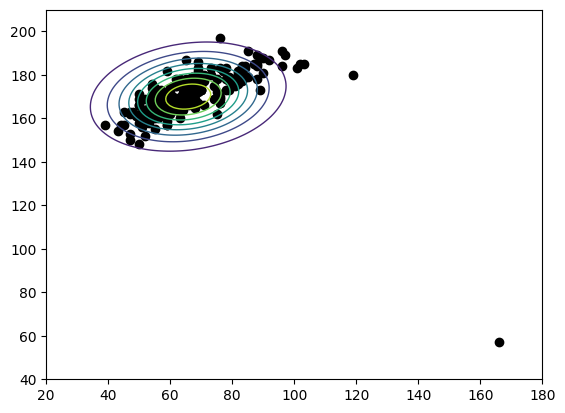

Taguchi score is:
[10.96333432 -1.58498805]


In [2]:
# coding: utf-8

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats
from numpy import linalg as la
from scipy.stats import norm
import seaborn as sns

from matplotlib import cm

davis = pd.read_csv('./data/Davis.csv').values
#x = davis[: ,2:4]


d = davis[: ,2:4]

plt.scatter( d[:,0], d[:,1],color='black')
plt.xlim(20,180)
plt.ylim(40,210)
#sns.kdeplot( x[:,0], x[:,1],kernel='gaus')


x =  np.arange(20, 180,1)
y =  np.arange(40, 210,1)
X, Y = np.meshgrid(x, y)
mx = d.mean(axis = 0)
xc = d - mx
sx = ( xc.T.dot(xc) / d[:,0].size ).astype(float)
f = lambda x, y: scipy.stats.multivariate_normal(mx, sx).pdf([x, y])
Z = np.vectorize(f)(X, Y)
plt.contour(X, Y, Z,levels=10,linewidths=1)
plt.show()

# データ中心化
mx = d.mean(axis = 0)
xc = d - mx
# 標本共分散行列
sx = ( xc.T.dot(xc) / d[:,0].size ).astype(float)
#タグチ指標の計算
SN = (xc[20]**2 )/np.diag(sx)
SN = SN.astype(np.float64)
MT = 10*np.log10(SN)
print ('Taguchi score is:')
print (MT)
